# Interconnection Queues Analysis

How likely is each project in the queue to be completed?

In [1]:
import gridstatusio as gs
import gridstatus as g
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import datetime
import requests
import Grid_Status_Functions as gf

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
df_datasets = pd.read_csv('https://data.gridstatus.io/datasets/historical_data_availability/latest.csv')

In [15]:
all_queues = g.get_interconnection_queues()

100%|█████████████████████████████████████████████| 7/7 [00:32<00:00,  4.64s/it]


In [19]:
all_queues.to_csv('int_qs.csv')

In [20]:
all_qs = pd.read_csv('int_qs.csv')

In [21]:
all_qs = all_queues.drop(columns=["Queue ID","Withdrawn Date","Withdrawal Comment"])

In [22]:
gf.basics(all_qs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20642 entries, 0 to 20641
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ISO                       20642 non-null  object 
 1   Project Name              15200 non-null  object 
 2   Interconnecting Entity    2075 non-null   object 
 3   County                    19578 non-null  object 
 4   State                     19716 non-null  object 
 5   Interconnection Location  11042 non-null  object 
 6   Transmission Owner        17764 non-null  object 
 7   Generation Type           19262 non-null  object 
 8   Capacity (MW)             20141 non-null  float64
 9   Summer Capacity (MW)      15723 non-null  object 
 10  Winter Capacity (MW)      15696 non-null  object 
 11  Queue Date                20235 non-null  object 
 12  Status                    20640 non-null  object 
 13  Proposed Completion Date  9808 non-null   object 
 14  Actual

,ISO,Project Name,Interconnecting Entity,County,State,Interconnection Location,Transmission Owner,Generation Type,Capacity (MW),Summer Capacity (MW),Winter Capacity (MW),Queue Date,Status,Proposed Completion Date,Actual Completion Date
0,Midcontinent ISO,None,None,Pointe Coupee,LA,500 kV switchyard at Big Cajon II,Entergy,Gas,15.0,15.0,15.0,2013-09-13T04:00:00Z,Done,None,None
1,Midcontinent ISO,None,None,,TX,Rich 138 kV substation,Entergy,Hydro,27.0,27.0,27.0,2012-05-15T04:00:00Z,Done,2016-01-31T05:00:00Z,None
2,Midcontinent ISO,None,None,Brown County,WI,Unknown,American Transmission Co. LLC,,255.0,255.0,255.0,1995-11-08T05:00:00Z,Withdrawn,2014-11-17T05:00:00Z,None
3,Midcontinent ISO,None,None,Trimble County,KY,Unknown,LG&E and KU Services Company as agent for Loui...,Coal,174.0,174.0,174.0,1998-12-01T05:00:00Z,Done,2016-01-01T05:00:00Z,None
4,Midcontinent ISO,None,None,Trimble County,KY,Unknown,LG&E and KU Services Company as agent for Loui...,Coal,174.0,174.0,174.0,1998-12-01T05:00:00Z,Done,2004-01-01T05:00:00Z,None


## Datasets by ISO

In [23]:
miso = all_qs[all_qs["ISO"] == 'Midcontinent ISO']

In [127]:
ercot = all_qs[all_qs["ISO"] == 'Electric Reliability Council of Texas']
caiso = all_qs[all_qs["ISO"] == 'California ISO']
isone = all_qs[all_qs["ISO"] == 'ISO New England']
nyiso = all_qs[all_qs["ISO"] == 'New York ISO']
pjm = all_qs[all_qs["ISO"] == 'PJM']
spp = all_qs[all_qs["ISO"] == 'Southwest Power Pool']

## ERCOT Interconnection Queue

In [53]:
gf.basics(ercot)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1203 entries, 15445 to 16647
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ISO                       1203 non-null   object 
 1   Project Name              1203 non-null   object 
 2   Interconnecting Entity    1203 non-null   object 
 3   County                    1203 non-null   object 
 4   State                     1203 non-null   object 
 5   Interconnection Location  1203 non-null   object 
 6   Transmission Owner        0 non-null      object 
 7   Generation Type           1203 non-null   object 
 8   Capacity (MW)             1203 non-null   float64
 9   Summer Capacity (MW)      0 non-null      object 
 10  Winter Capacity (MW)      0 non-null      object 
 11  Queue Date                1193 non-null   object 
 12  Status                    1203 non-null   object 
 13  Proposed Completion Date  1203 non-null   object 
 14  Act

,ISO,Project Name,Interconnecting Entity,County,State,Interconnection Location,Transmission Owner,Generation Type,Capacity (MW),Summer Capacity (MW),Winter Capacity (MW),Queue Date,Status,Proposed Completion Date,Actual Completion Date
15445,Electric Reliability Council of Texas,Goodnight Wind,"FGE Goodnight I, LLC",Armstrong,Texas,tap 345kV 79500 Alibates - 79503 Tule Canyon CKT2,None,Wind - Wind Turbine,531.0,None,None,2012-07-24 00:00:00,Completed,2023-12-30 00:00:00,NaT
15446,Electric Reliability Council of Texas,Harald (BearKat Wind B),CIP,Glasscock,Texas,59903 Bearkat 345kV,None,Wind - Wind Turbine,162.1,None,None,2013-11-27 00:00:00,Completed,2023-05-31 00:00:00,2020-05-12 00:00:00
15447,Electric Reliability Council of Texas,Nazareth Solar,"TX Nazareth Solar, LLC",Castro,Texas,tap 345kV 23914 Tule Canyon - 23912 Ogallala C2,None,Solar - Photovoltaic Solar,204.0,None,None,2014-06-19 00:00:00,Completed,2025-03-24 00:00:00,NaT
15448,Electric Reliability Council of Texas,Mesteno Wind,"Mesteno Windpower, LLC",Starr,Texas,80355 Del Sol 345kV,None,Wind - Wind Turbine,201.6,None,None,2014-12-30 00:00:00,Completed,2023-06-30 00:00:00,2019-12-12 00:00:00
15449,Electric Reliability Council of Texas,Priddy Wind,ENGIE North America,Mills,Texas,tap 345kV 1444 Brown – 3422 Killeen,None,Wind - Wind Turbine,302.4,None,None,2015-01-14 00:00:00,Completed,2023-03-15 00:00:00,2021-11-19 00:00:00


In [128]:
#Data cleanup

ercot = ercot.drop(columns=["ISO","State","Summer Capacity (MW)","Winter Capacity (MW)",
                            "Transmission Owner","Actual Completion Date","Interconnecting Entity"]).dropna()
ercot["Queue Date"] = pd.to_datetime(ercot["Queue Date"])
ercot["Proposed Completion Date"] = pd.to_datetime(ercot["Proposed Completion Date"])
ercot["Proposed Project Length"] = (ercot["Proposed Completion Date"] - ercot["Queue Date"]).dt.days
ercot["Interconnection Location"] = ercot["Interconnection Location"].str.replace(" ","").str.lower()

Of the active projects, will they be completed or not? For this, we need a dataset of completed and withdrawn project and then we need to apply them to projects in progress. Ercot data, unfortunately only has two categories, Active, and Complete.

In [129]:
ercot[ercot["Status"]=="Active"].head()

,Project Name,County,Interconnection Location,Generation Type,Capacity (MW),Queue Date,Status,Proposed Completion Date,Proposed Project Length
15475,Grandfalls Solar,Upton,tap345kv11028odessa-76000nmccamey,Solar - Photovoltaic Solar,178.00,2016-05-24,Active,2026-07-01,3690
15478,Holstein 2 Solar,Nolan,11406centralbluff345kv,Solar - Photovoltaic Solar,101.70,2016-12-21,Active,2024-04-26,2683
15482,Monte Cristo 1 Wind,Hidalgo,8574pomelo345kv,Wind - Wind Turbine,236.90,2017-04-11,Active,2024-12-31,2821
15484,Horseshoe Bend Solar,Brown,1444brown345kv,Solar - Photovoltaic Solar,330.75,2017-06-23,Active,2025-05-31,2899
15489,Azalea Springs Solar,Angelina,tap138kvjimenglish–lufkinchippermill,Solar - Photovoltaic Solar,180.00,2017-07-26,Active,2024-10-31,2654


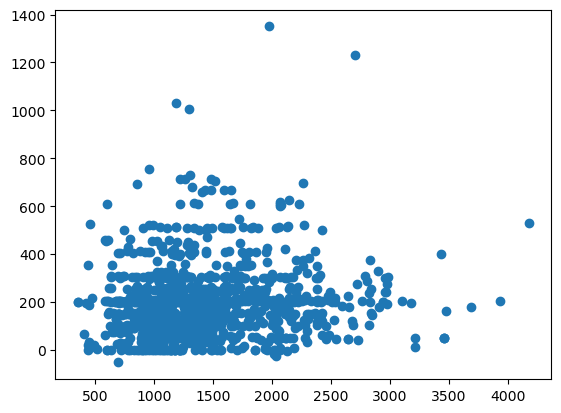

In [164]:
plt.figure()
plt.scatter(ercot["Proposed Project Length"],ercot["Capacity (MW)"])
plt.xlabel = "Project Length (Days)"
plt.ylabel = "Capacity (MW)"
plt.title = "Project Completion Time vs. Capacity"
plt.show()

In [190]:
gen_types = ercot.groupby('Generation Type',as_index=False).agg('mean')

In [191]:
gen_types = gen_types.sort_values(by=["Proposed Project Length"])

<AxesSubplot:xlabel='Generation Type'>

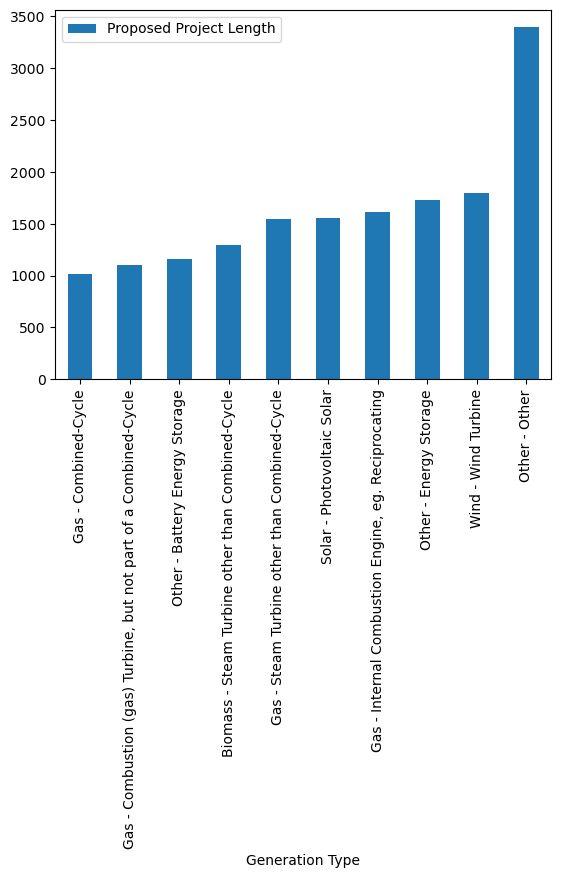

In [192]:
gen_types.plot(kind="bar",x="Generation Type", y="Proposed Project Length")

Wind projects have on average the longest proposed project length. What is other?

In [188]:
ercot[ercot["Generation Type"]=="Other - Other"]

,Project Name,County,Interconnection Location,Generation Type,Capacity (MW),Queue Date,Status,Proposed Completion Date,Proposed Project Length
16433,Barcelona TxHSR TPSS HN-4,Harris,tap138kv45885hocklyc-46220peters,Other - Other,50.0,2019-01-30,Active,2028-07-15,3454
16434,Tokyo TxHSR TPSS EW-1,Ellis,tap138kv2241ennisw-2321waxahachie,Other - Other,50.0,2019-01-30,Active,2028-07-15,3454
16435,Atlanta TxHSR TPSS DS-1,Dallas,tap138kv2429watermille-3083wilmer,Other - Other,50.0,2019-01-30,Active,2028-07-15,3454
16604,Turin TxHSR TPSS HN-6,Grimes,8crutchfield138kv,Other - Other,50.0,2019-09-27,Active,2028-07-15,3214


Now does generation type have any correlation with capacity?

<AxesSubplot:xlabel='Generation Type'>

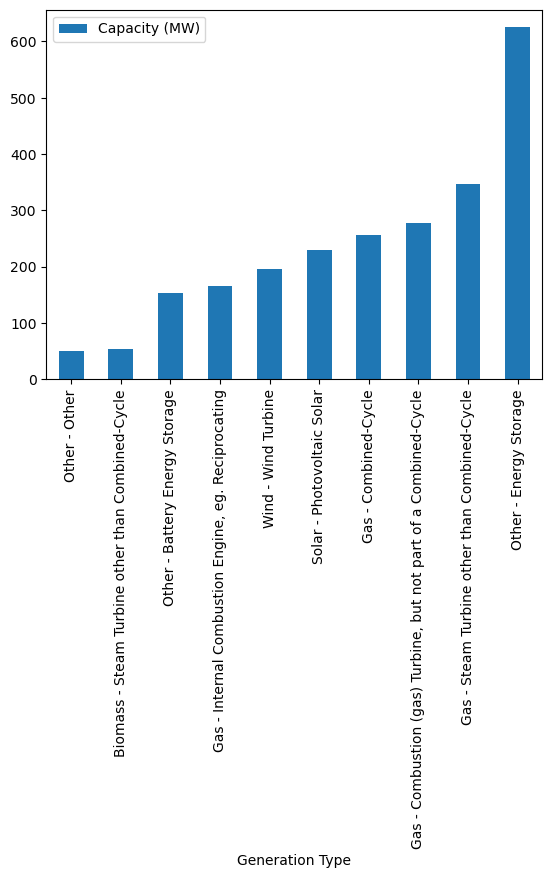

In [193]:
gen_types = gen_types.sort_values(by=["Capacity (MW)"])
gen_types.plot(kind="bar",x="Generation Type", y="Capacity (MW)")

In [135]:
#we can analyze Internconnection Loaction by kilavolts

ercot[ercot["Interconnection Location"].str.contains('kv')==False]

,Project Name,County,Interconnection Location,Generation Type,Capacity (MW),Queue Date,Status,Proposed Completion Date,Proposed Project Length
15845,Lily Solar (Close Boze - I20 - Rosehill),Kaufman,6903bozeswitch(closepathtorosehillviai20_rc),Solar - Photovoltaic Solar,0.00,2021-05-10,Completed,2022-12-31,600
15846,Lily Storage (Close Boze - I20 - Rosehill),Kaufman,6903bozeswitch(closepathtorosehillviai20_rc),Other - Battery Energy Storage,0.00,2021-05-10,Completed,2022-12-31,600
16052,Aggie Energy storage,Brazos,taborrd(#32882),Other - Battery Energy Storage,104.40,2021-08-16,Active,2024-05-30,1018
16093,Tidwell Prairie IV Energy Storage,Robertson,taptnpone39950andtwinoak3400,Other - Battery Energy Storage,304.90,2021-11-15,Active,2025-11-01,1447
16099,Bug Tussle Wind Project,Lamar,doubletap1690vallyses15/1729valsth5and1692pari...,Wind - Wind Turbine,396.80,2022-01-13,Active,2025-04-01,1174
16127,Temple II Repower,Bell,3413knobcreek,Gas - Combined-Cycle,0.00,2022-08-05,Active,2023-10-15,436
16128,Pyron Wind Repower,Nolan,existingtkwswbus#1048,Wind - Wind Turbine,19.92,2022-08-16,Active,2023-12-15,486
16237,Frio Farm,Frio,bigfootsubstation\npssebusbig_foot4anr8221,Solar - Photovoltaic Solar,106.50,2021-12-20,Active,2024-09-30,1015
16288,Bar Candela Solar SLF,Freestone,longlakesub(bus3280)–longlaketapswitch(bus3279),Solar - Photovoltaic Solar,200.30,2022-03-21,Active,2026-06-30,1562
16289,Bar Candela Storage SLF,Freestone,longlakesub(bus3280)–longlaketapswitch(bus3279),Other - Battery Energy Storage,0.00,2022-03-21,Active,2026-06-30,1562


In [143]:
ercot.loc[(ercot["Interconnection Location"].str.contains('138kv'), ["Generation Type"])].value_counts()

Generation Type                                                 
Other - Battery Energy Storage                                      291
Solar - Photovoltaic Solar                                          185
Wind - Wind Turbine                                                  21
Gas - Combustion (gas) Turbine, but not part of a Combined-Cycle      9
Other - Other                                                         4
Gas - Internal Combustion Engine, eg. Reciprocating                   3
Biomass - Steam Turbine other than Combined-Cycle                     1
Gas - Combined-Cycle                                                  1
Gas - Steam Turbine other than Combined-Cycle                         1
dtype: int64

In [144]:
ercot.loc[(ercot["Interconnection Location"].str.contains('345kv'), ["Generation Type"])].value_counts()

Generation Type                                                 
Solar - Photovoltaic Solar                                          289
Other - Battery Energy Storage                                      214
Wind - Wind Turbine                                                  78
Gas - Combined-Cycle                                                 10
Gas - Combustion (gas) Turbine, but not part of a Combined-Cycle      3
Gas - Steam Turbine other than Combined-Cycle                         1
Other - Energy Storage                                                1
dtype: int64

It seems like solar projects are far more likely to interconnect at 345kv than 138kv.

## Good datasets to examine based on withdrawn, active, and completed categories

In [195]:
caiso.Status.value_counts()

WITHDRAWN    1613
ACTIVE        464
COMPLETED     201
Name: Status, dtype: int64

In [196]:
miso.Status.value_counts()

Withdrawn                   1989
Active                      1410
Done                         807
Withdrawn - Pending Cure      46
                               1
Name: Status, dtype: int64

In [197]:
isone.Status.value_counts()

Withdrawn    802
Active       405
Completed    321
Name: Status, dtype: int64

In [200]:
nyiso.Status.value_counts()

Withdrawn    872
Active       515
Completed    121
Name: Status, dtype: int64

## CAISO

In [ ]:
all_qs = pd.read_csv('int_qs.csv')

In [205]:
gf.basics(caiso)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 4253 to 6530
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ISO                       2278 non-null   object 
 1   Project Name              2278 non-null   object 
 2   Interconnecting Entity    0 non-null      object 
 3   County                    2273 non-null   object 
 4   State                     2274 non-null   object 
 5   Interconnection Location  2278 non-null   object 
 6   Transmission Owner        2278 non-null   object 
 7   Generation Type           2278 non-null   object 
 8   Capacity (MW)             2278 non-null   float64
 9   Summer Capacity (MW)      0 non-null      object 
 10  Winter Capacity (MW)      0 non-null      object 
 11  Queue Date                2278 non-null   object 
 12  Status                    2278 non-null   object 
 13  Proposed Completion Date  2072 non-null   object 
 14  Actua

,ISO,Project Name,Interconnecting Entity,County,State,Interconnection Location,Transmission Owner,Generation Type,Capacity (MW),Summer Capacity (MW),Winter Capacity (MW),Queue Date,Status,Proposed Completion Date,Actual Completion Date
4253,California ISO,MONTEZUMA (HIGH WINDS III),None,SOLANO,CA,Birds Landing Sub 230 kV Bus,PGAE,Wind Turbine + Storage,38.00,None,None,2003-11-18 08:00:00,ACTIVE,2010-12-30 08:00:00,NaT
4254,California ISO,TULE WIND,None,SAN DIEGO,CA,Boulevard East Substation 138 kV,SDGE,Wind Turbine,193.80,None,None,2004-05-24 07:00:00,ACTIVE,2022-12-31 08:00:00,NaT
4255,California ISO,FRESNO COGENERATION EXPANSION PROJECT,None,FRESNO,CA,Helm-Kerman 70kV line,PGAE,Steam Turbine + Storage,73.27,None,None,2005-03-30 08:00:00,ACTIVE,2023-02-28 08:00:00,NaT
4256,California ISO,LAKE ELSINORE ADVANCED PUMPED STORAGE PROJECT,None,RIVERSIDE,CA,Proposed Lee Lake Substation 500 kV,SDGE,Storage,500.00,None,None,2005-06-21 07:00:00,ACTIVE,2028-12-31 08:00:00,NaT
4257,California ISO,SANDSTORM WIND POWER,None,RIVERSIDE,CA,Devers - San Bernardino 230 kV line,SCE,Wind Turbine + Storage,150.00,None,None,2006-10-23 07:00:00,ACTIVE,2024-10-30 07:00:00,NaT


In [640]:
caiso = all_qs[all_qs["ISO"] == 'California ISO']

In [641]:
caiso = caiso.drop(columns=["ISO","State","Summer Capacity (MW)","Winter Capacity (MW)","Interconnecting Entity","County"])
caiso["Queue Date"] = pd.to_datetime(caiso["Queue Date"])
caiso["Actual Completion Date"] = caiso["Actual Completion Date"].fillna(caiso["Proposed Completion Date"])
caiso = caiso[caiso["Actual Completion Date"].isna()==False]
caiso["Project Length"] = (caiso["Actual Completion Date"] - caiso["Queue Date"]).dt.days
caiso = caiso.drop(columns=["Actual Completion Date","Queue Date","Proposed Completion Date"])
caiso["Interconnection Location"] = caiso["Interconnection Location"].str.replace(" ","").str.lower()
caiso = caiso[caiso["Generation Type"] != "Other"]

In [642]:
caiso["Storage"] = caiso["Generation Type"].str.contains("Storage")
caiso.loc[(caiso['Generation Type'] == 'storage'), 'Generation Type'] = 'STORAGE'
caiso.loc[(caiso['Generation Type'] == 'storagestorage'), 'Generation Type'] = 'STORAGE'
caiso.loc[(caiso['Generation Type'] == 'storageother'), 'Generation Type'] = 'STORAGE'
caiso.loc[(caiso['Generation Type'] == 'combinedcyclecombinedcycle'), 'Generation Type'] = 'combinedcycle'
caiso.loc[(caiso['Generation Type'] == 'steamsteam'), 'Generation Type'] = 'steam'
caiso["Generation Type"] = caiso["Generation Type"].str.replace("storage","")
caiso["Generation Type"] = caiso["Generation Type"].str.replace("turbine","")
caiso["Generation Type"] = caiso["Generation Type"].str.lower().str.replace(" ","")
caiso["Generation Type"] = caiso["Generation Type"].str.replace('\+', '', regex=True)

In [643]:
caiso["Generation Type"].value_counts()

photovoltaic                            704
storage                                 474
photovoltaicstorage                     228
windturbine                             192
storagephotovoltaic                     182
steamturbine                            161
combinedcycle                            93
gasturbine                               62
combustionturbine                        57
reciprocatingengine                      14
windturbinestorage                       14
hydro                                    12
storagewindturbine                        9
combustionturbinestorage                  4
photovoltaiccombustionturbine             4
steamturbinestorage                       4
solarthermal                              3
combustionturbinephotovoltaic             3
storagegasturbine                         3
storagewindturbinephotovoltaic            3
storagephotovoltaicwindturbine            3
photovoltaicwindturbine                   3
cogeneration                    

In [644]:
sort_string = lambda x: ''.join(sorted(x))
caiso['Type Sorted'] = caiso['Generation Type'].apply(sort_string)

In [645]:
len(set(caiso["Type Sorted"]))

28

In [646]:
caiso["Type Sorted"].value_counts()

achilooopttv                            704
aegorst                                 474
aaceghilooooprstttv                     410
bdeiinnrtuw                             192
abeeimnrsttu                            161
bcccdeeilmnoy                            93
abeginrstu                               62
bbceiimnnoorsttuu                        57
abdeegiinnorrsttuw                       23
acceeeggiiinnnoprrt                      14
dhory                                    12
aabcdeeghiiilnnooooprrsttttuvw           12
abbccehiiilmnnoooooprsttttuuv             7
abbceegiimnnooorrsstttuu                  5
aabeegginorrssttu                         5
abcdehiiilnnoooprtttuvw                   4
aabeeegimnorrsstttu                       4
aaehllmorrst                              3
aceeginnoort                              3
aaaeeghllmoorrrsstt                       2
aabbeeeeiimmnnrrssttttuu                  2
aeeghoorrstt                              2
aabbbceeeegiiimmnnnooorrrssstttt

In [470]:
#Getting rid of duplicate generation type names
#There has to be a way of checking for equal strings in pandas column regardless of string order

caiso = caiso[caiso["Generation Type"] != "Other"]
caiso.loc[(caiso['Generation Type'] == 'Storage + Photovoltaic'), 'Generation Type'] = 'Photovoltaic + Storage'
caiso.loc[(caiso['Generation Type'] == 'Storage + Wind Turbine'), 'Generation Type'] = 'Wind Turbine + Storage'
caiso.loc[(caiso['Generation Type'] == 'Storage + Storage'), 'Generation Type'] = 'Storage'
caiso.loc[(caiso['Generation Type'] == 'Storage + Other'), 'Generation Type'] = 'Storage'
caiso.loc[(caiso['Generation Type'] == 'Photovoltaic + Storage + Wind Turbine'), 'Generation Type'] = 'Photovoltaic + Wind Turbine + Storage'
caiso.loc[(caiso['Generation Type'] == 'Combined Cycle + Combined Cycle'), 'Generation Type'] = 'Combined Cycle'
caiso.loc[(caiso['Generation Type'] == 'Steam Turbine + Steam Turbine'), 'Generation Type'] = 'Steam Turbine'
caiso.loc[(caiso['Generation Type'] == 'Storage + Solar Thermal'), 'Generation Type'] = 'Solar Thermal + Storage'
caiso.loc[(caiso['Generation Type'] == 'Storage + Gas Turbine'), 'Generation Type'] = 'Gas Turbine + Storage'
caiso.loc[(caiso['Generation Type'] == 'Storage + Combustion Turbine'), 'Generation Type'] = 'Combustion Turbine + Storage'
caiso.loc[(caiso['Generation Type'] == 'Storage + Steam Turbine + Combustion Turbine'), 'Generation Type'] = 'Combustion Turbine + Storage + Steam Turbine'
caiso.loc[(caiso['Generation Type'] == 'Combustion Turbine + Photovoltaic'), 'Generation Type'] = 'Photovoltaic + Combustion Turbine'
caiso.loc[(caiso['Generation Type'] == 'Wind Turbine + Photovoltaic'), 'Generation Type'] = 'Photovoltaic + Wind Turbine'
caiso.loc[(caiso['Generation Type'] == 'Storage + Photovoltaic + Wind Turbine'), 'Generation Type'] = 'Photovoltaic + Wind Turbine + Storage'
caiso.loc[(caiso['Generation Type'] == 'Storage + Wind Turbine + Photovoltaic'), 'Generation Type'] = 'Photovoltaic + Wind Turbine + Storage'
caiso.loc[(caiso['Generation Type'] == 'Wind Turbine + Photovoltaic + Storage'), 'Generation Type'] = 'Photovoltaic + Wind Turbine + Storage'
caiso.loc[(caiso['Generation Type'] == 'Wind Turbine + Storage + Photovoltaic'), 'Generation Type'] = 'Photovoltaic + Wind Turbine + Storage'

In [471]:
#For formatting with storage at the end:

caiso.loc[(caiso['Generation Type'] == 'Photovoltaic + Storage + Combustion Turbine'), 'Generation Type'] = 'Photovoltaic + Combustion Turbine + Storage'
caiso.loc[(caiso['Generation Type'] == 'Combustion Turbine + Storage + Steam Turbine'), 'Generation Type'] = 'Combustion Turbine + Steam Turbine + Storage'

In [472]:
caiso["Generation Type"] = caiso["Generation Type"].str.lower().str.replace(" ","")
caiso["Generation Type"] = caiso["Generation Type"].str.lower().str.replace("+","")

/var/folders/fb/lsg_5xw57mz9vhkmk6dvkfkw0000gn/T/ipykernel_26012/2441963617.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  caiso["Generation Type"] = caiso["Generation Type"].str.lower().str.replace("+","")


In [473]:
caiso.loc[(caiso['Generation Type'] == 'storage'), 'Generation Type'] = 'STORAGE'

In [474]:
caiso["Generation Type"] = caiso["Generation Type"].str.replace("storage","")

In [475]:
caiso["Generation Type"].value_counts()

photovoltaic                     1114
STORAGE                           477
windturbine                       215
steamturbine                      167
combinedcycle                      95
gasturbine                         67
combustionturbine                  62
photovoltaicwindturbine            16
reciprocatingengine                14
hydro                              12
photovoltaiccombustionturbine       8
solarthermal                        5
cogeneration                        3
combustionturbinesteamturbine       2
photovoltaicsteamturbine            1
Name: Generation Type, dtype: int64

In [ ]:
#Create multiple renewables, multiple non-renewables, mixed - projects with renewable and non-renewable components
#Create yes or no storage column, excluding storage projects

In [ ]:
#Create dummy variables

ca

In [ ]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

In [ ]:
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print(‘r2 socre is ‘,score)
print(‘mean_sqrd_error is==’,mean_squared_error(y_test,y_prediction))
print(‘root_mean_squared error of is==’,np.sqrt(mean_squared_error(y_test,y_prediction)))